In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bike-sharing-demand/sampleSubmission.csv
/kaggle/input/bike-sharing-demand/train.csv
/kaggle/input/bike-sharing-demand/test.csv


In [2]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
import calendar
from datetime import datetime

In [3]:
train_data = pd.read_csv('../input/bike-sharing-demand/train.csv')
test_X = pd.read_csv('../input/bike-sharing-demand/test.csv')
test_Y = pd.read_csv('../input/bike-sharing-demand/sampleSubmission.csv')

In [4]:
train_X, train_Y = train_data.iloc[:, :-1], train_data.loc[:,'count']
train_Y = np.log1p(train_Y)

In [5]:
train_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 935.6+ KB


In [6]:
train_Y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 10886 entries, 0 to 10885
Series name: count
Non-Null Count  Dtype  
--------------  -----  
10886 non-null  float64
dtypes: float64(1)
memory usage: 85.2 KB


In [7]:
train_Y.head(2)

0    2.833213
1    3.713572
Name: count, dtype: float64

In [8]:
train_X.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32


In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [10]:
train_X.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32


In [11]:
train_X['year'] = train_X['datetime'].apply(lambda x: x.split()[0].split('-')[0])
train_X['month'] = train_X['datetime'].apply(lambda x: x.split()[0].split('-')[1])
train_X['day'] = train_X['datetime'].apply(lambda x: x.split()[0].split('-')[2])
train_X['hour'] = train_X['datetime'].apply(lambda x: x.split()[1].split(':')[0])

train_X['tempDate'] = train_X['datetime'].apply(lambda x: x.split()[0])
train_X["weekday"] = train_X['tempDate'].apply(lambda x : calendar.day_name[datetime.strptime(x,"%Y-%m-%d").weekday()])

In [12]:
for value in ['year', 'month', 'day', 'hour']:
    train_X[value] = pd.to_numeric(train_X[value], errors='coerce')
    
train_X['weekday']= train_X['weekday'].astype('category')

In [13]:
train_X['weekday'].cat.categories

train_X['weekday'] = train_X['weekday'].cat.rename_categories([5,1,6,0,4,2,3])


In [14]:
train_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   datetime    10886 non-null  object  
 1   season      10886 non-null  int64   
 2   holiday     10886 non-null  int64   
 3   workingday  10886 non-null  int64   
 4   weather     10886 non-null  int64   
 5   temp        10886 non-null  float64 
 6   atemp       10886 non-null  float64 
 7   humidity    10886 non-null  int64   
 8   windspeed   10886 non-null  float64 
 9   casual      10886 non-null  int64   
 10  registered  10886 non-null  int64   
 11  year        10886 non-null  int64   
 12  month       10886 non-null  int64   
 13  day         10886 non-null  int64   
 14  hour        10886 non-null  int64   
 15  tempDate    10886 non-null  object  
 16  weekday     10886 non-null  category
dtypes: category(1), float64(3), int64(11), object(2)
memory usage: 1.3+ MB


In [15]:
train_X.head(1)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,year,month,day,hour,tempDate,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,2011,1,1,0,2011-01-01,6


In [16]:
train_X = train_X.drop(['tempDate', 'datetime', 'casual', 'registered'], axis=1)

In [17]:
train_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      10886 non-null  int64   
 1   holiday     10886 non-null  int64   
 2   workingday  10886 non-null  int64   
 3   weather     10886 non-null  int64   
 4   temp        10886 non-null  float64 
 5   atemp       10886 non-null  float64 
 6   humidity    10886 non-null  int64   
 7   windspeed   10886 non-null  float64 
 8   year        10886 non-null  int64   
 9   month       10886 non-null  int64   
 10  day         10886 non-null  int64   
 11  hour        10886 non-null  int64   
 12  weekday     10886 non-null  category
dtypes: category(1), float64(3), int64(9)
memory usage: 1.0 MB


In [18]:
train_Y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 10886 entries, 0 to 10885
Series name: count
Non-Null Count  Dtype  
--------------  -----  
10886 non-null  float64
dtypes: float64(1)
memory usage: 85.2 KB


<Axes: >

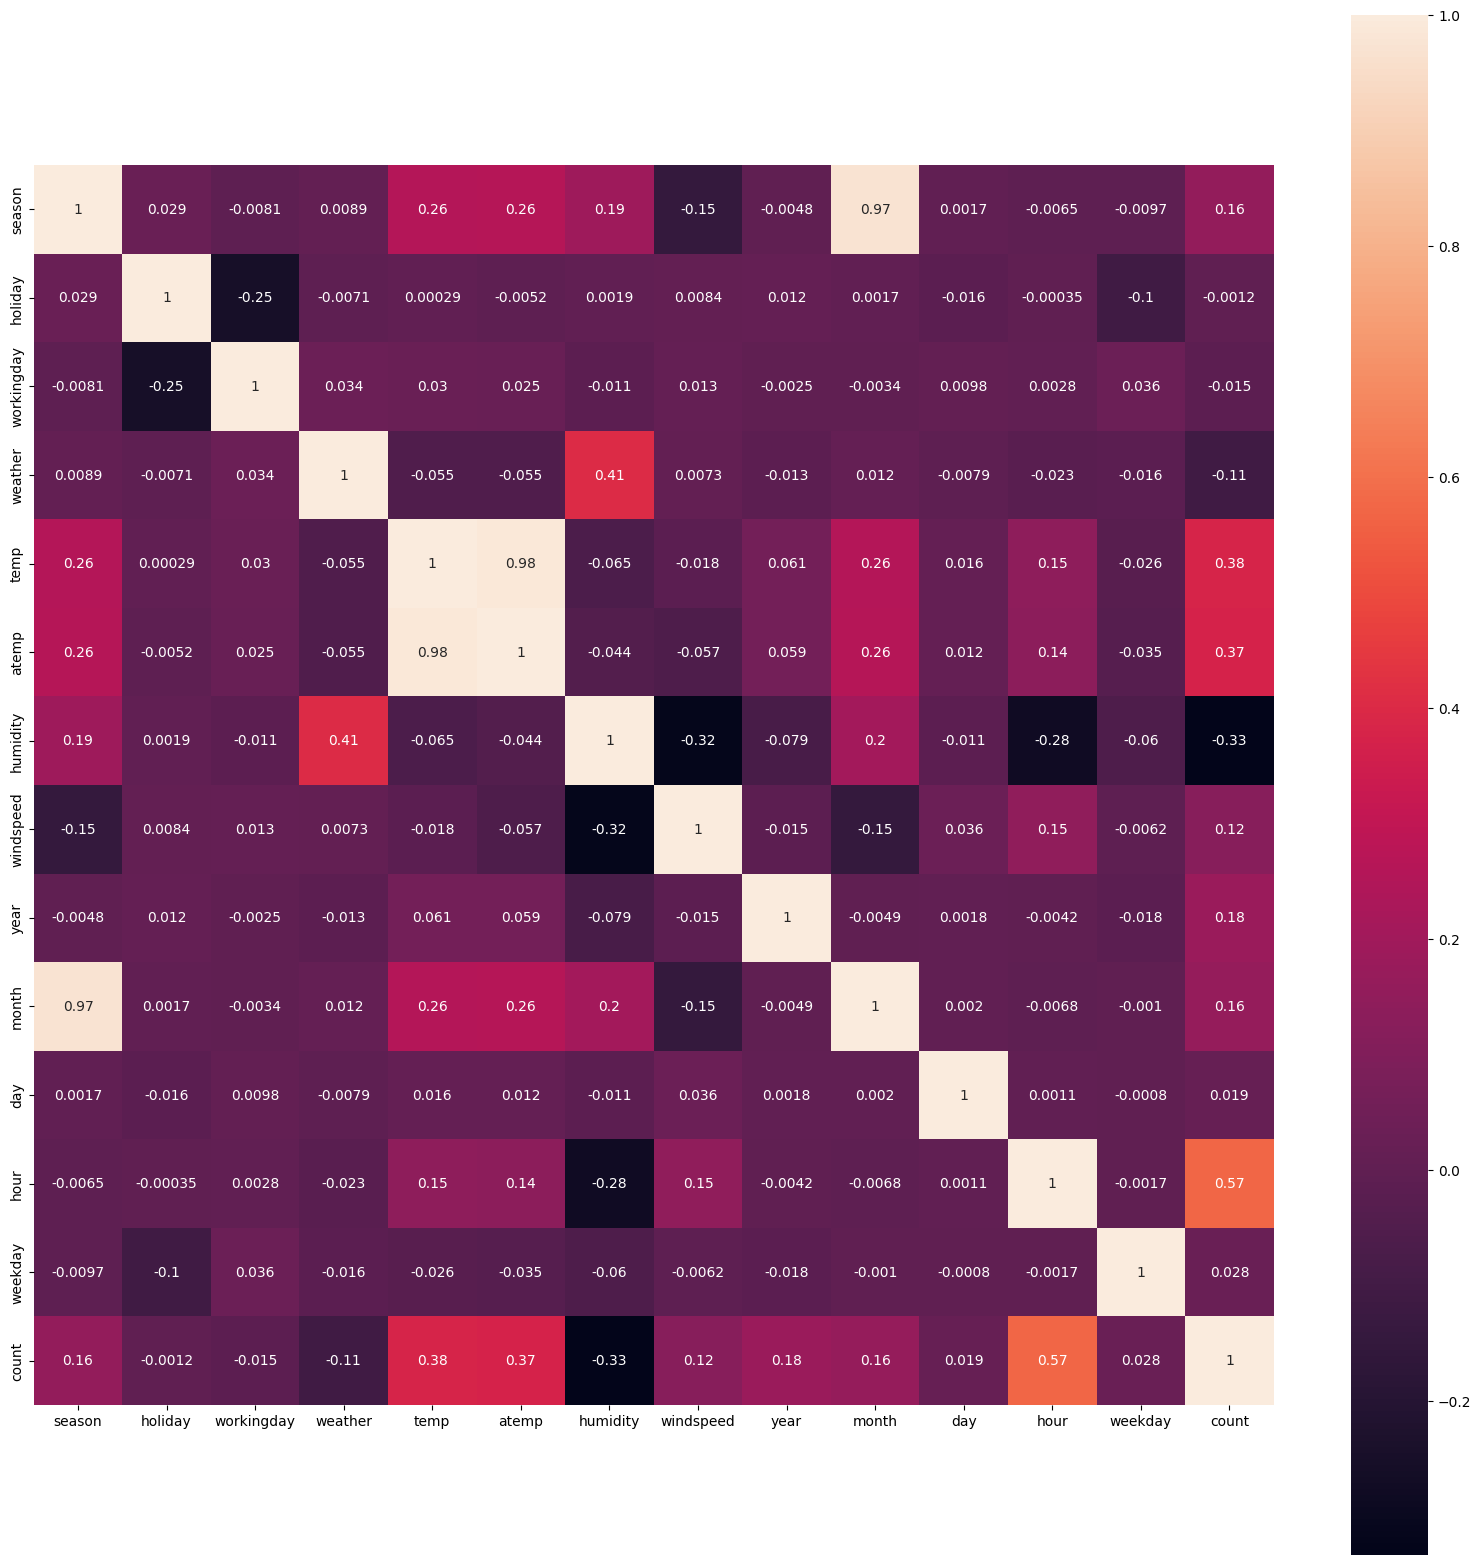

In [19]:
fig = plt.figure(figsize=[20,20])
temp = pd.concat([train_X, train_Y], axis=1)
temp.head(1)
sns.heatmap(temp.corr(), annot=True, square=True)

In [20]:
model = LinearRegression()

model.fit(train_X, train_Y)

LinearRegression()

In [21]:
pred = model.predict(train_X)

In [22]:
def rmsle(y, y_):
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

In [23]:
rmsle(np.exp(train_Y), np.exp(pred))

0.9774163057674164

In [24]:
lasso = Lasso()
rmsle_scorer = metrics.make_scorer(rmsle,greater_is_better=False)
lasso_params = {'max_iter':[3000],'alpha':[0.001,0.01,0.1,1,10,100,1000]}
grid_lasso = GridSearchCV(lasso,lasso_params,scoring=rmsle_scorer,cv=5)
grid_lasso.fit(train_X,train_Y)
preds = grid_lasso.predict(train_X)
rmsle(np.exp(train_Y), np.exp(pred))

0.9774163057674164

In [25]:
ridge = Ridge()

#우리가 튜닝하고자하는 Ridge의 파라미터 중 특정 파라미터에 배열 값으로 넘겨주게 되면 테스트 후 어떤 파라미터가 최적의 값인지 알려줌 
ridge_params = {'max_iter':[3000],'alpha':[0.001,0.01,0.1,1,10,100,1000]}
rmsle_scorer = metrics.make_scorer(rmsle,greater_is_better=False)
grid_ridge = GridSearchCV(ridge,ridge_params,scoring=rmsle_scorer,cv=5)

grid_ridge.fit(train_X,train_Y)
preds = grid_ridge.predict(train_X)
print(grid_ridge.best_params_)
rmsle(train_Y, preds)

{'alpha': 0.001, 'max_iter': 3000}


0.2311365904841066

In [26]:
rf = RandomForestRegressor()

rf_params = {'n_estimators':[1,10,100]}
grid_rf = GridSearchCV(rf,rf_params,scoring=rmsle_scorer,cv=5)
grid_rf.fit(train_X, train_Y)
preds = grid_rf.predict(train_X)
rmsle(np.exp(train_Y), np.exp(pred))

0.9774163057674164

In [27]:
rmsle(np.exp(train_Y)-1, np.exp(pred)-1)

1.015451234268639

In [28]:
gb = GradientBoostingRegressor()
gb_params={'max_depth':range(1,11,1),'n_estimators':[1,10,100]}
grid_gb=GridSearchCV(gb,gb_params,scoring=rmsle_scorer,cv=5)
grid_gb.fit(train_X,train_Y)
preds = grid_gb.predict(train_X)
rmsle(np.exp(train_Y), np.exp(pred))

0.9774163057674164

In [29]:
test_X.head(1)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027


In [30]:
test_X['year'] = test_X['datetime'].apply(lambda x: x.split()[0].split('-')[0])
test_X['month'] = test_X['datetime'].apply(lambda x: x.split()[0].split('-')[1])
test_X['day'] = test_X['datetime'].apply(lambda x: x.split()[0].split('-')[2])
test_X['hour'] = test_X['datetime'].apply(lambda x: x.split()[1].split(':')[0])

test_X['tempDate'] = test_X['datetime'].apply(lambda x: x.split()[0])
test_X["weekday"] = test_X['tempDate'].apply(lambda x : calendar.day_name[datetime.strptime(x,"%Y-%m-%d").weekday()])

for value in ['year', 'month', 'day', 'hour']:
    test_X[value] = pd.to_numeric(test_X[value], errors='coerce')
    
test_X['weekday']= test_X['weekday'].astype('category')

test_X['weekday'].cat.categories

test_X['weekday'] = test_X['weekday'].cat.rename_categories([5, 1, 6, 0, 4, 2, 3])

tempDate = test_X['datetime']

test_X = test_X.drop(['tempDate', 'datetime'], axis=1)

In [31]:
preds = grid_gb.predict(test_X)

In [32]:
submission = pd.DataFrame()
submission['datetime'] = tempDate
submission['count'] = np.exp(preds)-1
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  6493 non-null   object 
 1   count     6493 non-null   float64
dtypes: float64(1), object(1)
memory usage: 101.6+ KB


In [33]:
submission.to_csv("submission.csv", index=False)